Adapted from http://scikit-learn.org/stable/auto_examples/model_selection/plot_underfitting_overfitting.html

In [1]:
include("preamble.jl")

 in depwarn at deprecated.jl:73
 in oldstyle_vcat_warning at /Applications/Julia-0.4.3.app/Contents/Resources/julia/lib/julia/sys.dylib
 in vect at abstractarray.jl:38
 in find_in_path at /Users/cedric/.julia/v0.4/Autoreload/src/files.jl:11
 in find_file at /Users/cedric/.julia/v0.4/Autoreload/src/files.jl:40
 in arequire at /Users/cedric/.julia/v0.4/Autoreload/src/Autoreload.jl:50
 in include at /Applications/Julia-0.4.3.app/Contents/Resources/julia/lib/julia/sys.dylib
 in include_from_node1 at /Applications/Julia-0.4.3.app/Contents/Resources/julia/lib/julia/sys.dylib
 in include_string at loading.jl:266
 in execute_request_0x535c5df2 at /Users/cedric/.julia/v0.4/IJulia/src/execute_request.jl:177
 in eventloop at /Users/cedric/.julia/v0.4/IJulia/src/IJulia.jl:141
 in anonymous at task.jl:447
while loading /Users/cedric/Programa/Sklearn/notebooks/preamble.jl, in expression starting on line 5


In [2]:
#using Sklearn: Pipeline

 in depwarn at deprecated.jl:73
 [inlined code] from deprecated.jl:694
 in require at no file:0
 in arequire at /Users/cedric/.julia/v0.4/Autoreload/src/Autoreload.jl:87
 in include at /Applications/Julia-0.4.3.app/Contents/Resources/julia/lib/julia/sys.dylib
 in include_from_node1 at /Applications/Julia-0.4.3.app/Contents/Resources/julia/lib/julia/sys.dylib
 in include_string at loading.jl:266
 in execute_request_0x535c5df2 at /Users/cedric/.julia/v0.4/IJulia/src/execute_request.jl:177
 in eventloop at /Users/cedric/.julia/v0.4/IJulia/src/IJulia.jl:141
 in anonymous at task.jl:447
while loading /Users/cedric/Programa/Sklearn/notebooks/preamble.jl, in expression starting on line 5


In [3]:
@pyimport2 sklearn.pipeline: Pipeline
@pyimport2 sklearn.preprocessing: PolynomialFeatures
@pyimport2 sklearn.linear_model: LinearRegression
@pyimport2 sklearn: cross_validation

__anon__

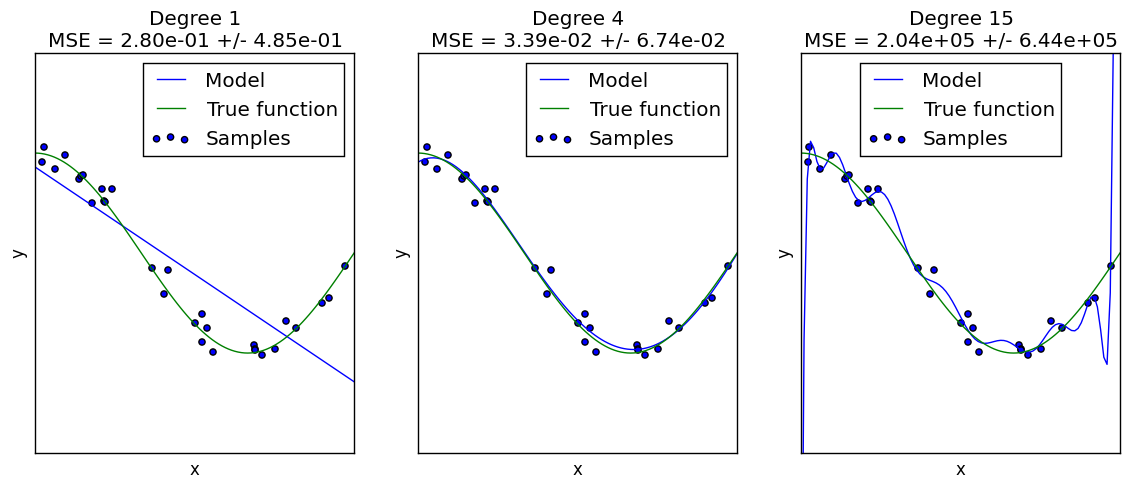

In [4]:
srand(2)

n_samples = 30
degrees = [1, 4, 15]

true_fun(X) = cos(1.5 * pi * X)
X = sort(rand(n_samples))
y = true_fun(X) + randn(n_samples) * 0.1

figure(figsize=(14, 5))
for (i, degree) in enumerate(degrees)
    ax = subplot(1, length(degrees), i)
    setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degree, include_bias=false)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    fit!(pipeline, X'', y)

    # Evaluate the models using crossvalidation
    scores = cross_validation.cross_val_score(pipeline, X'', y, scoring="mean_squared_error", cv=10)

    X_test = linspace(0, 1, 100)
    plot(X_test, predict(pipeline, X_test''), label="Model")
    plot(X_test, true_fun(X_test), label="True function")
    scatter(X, y, label="Samples")
    xlabel("x")
    ylabel("y")
    xlim((0, 1))
    ylim((-2, 2))
    legend(loc="best")
    title(@sprintf("Degree %d\nMSE = %.2e +/- %.2e", degree, -mean(scores), std(scores)))
end

In [13]:
check_consistent_length([1,2,3], [4,5,6])

LoadError: LoadError: MethodError: `length` has no method matching length(::Filter{Function,Tuple{Array{Int64,1},Array{Int64,1}}})
while loading In[13], in expression starting on line 1